In [38]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [39]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [40]:
import re
result_df = pd.json_normalize(result_file)
result_df.rename(columns=lambda c: re.sub(r'^simulation_results.', '', c), inplace=True)
result_df.rename(columns=lambda c: re.sub(r'^simulation_config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df

,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,controller_config.hidden_layer_size,...,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,100000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.033316,0.006175,"[0.01329169116206153, 0.016692655888705655, 0....",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
1,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.297731,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
2,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.284137,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
3,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.301442,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
4,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.311485,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.005332,0.000400,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
149,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.073615,0.006958,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
150,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.036684,0.004200,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
151,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,100000,5,3.0,0.3,0.236047,0.084580,"[0.0, 0.05136553886811884, 0.05848383054313422...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."


In [41]:
result_df.columns

Index(['completed_training_steps', 'controller',
       'controller_config.reward_function', 'controller_config.epsilon_start',
       'controller_config.epsilon_end', 'controller_config.learning_rate',
       'controller_config.gamma', 'controller_config.memory_size',
       'controller_config.batch_size', 'controller_config.hidden_layer_size',
       'controller_config.num_hidden_layers',
       'controller_config.target_network_update_rate',
       'controller_config.optimizing_rate', 'model_file', 'state',
       'mission_size', 'num_agents', 'sensor_generation_frequency',
       'sensor_generation_probability', 'sensor_packet_lifecycle',
       'simulation_steps', 'training', 'step_by_step', 'plots', 'verbose',
       'repetitions', 'campaign_config.training_steps',
       'campaign_config.testing_steps',
       'campaign_config.live_testing_frequency',
       'campaign_config.testing_repetitions', 'max_possible_throughput',
       'expected_throughput', 'avg_throughput', 'control

In [42]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,0,100000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,3.0,0.3,0.033316,0.006175,"[0.01329169116206153, 0.016692655888705655, 0....",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
1,1,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,3.0,0.3,0.297731,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
2,2,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,3.0,0.3,0.284137,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
3,3,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,3.0,0.3,0.301442,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
4,4,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,3.0,0.3,0.311485,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."


In [43]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['completed_training_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])
    result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [44]:
result_df = result_df[result_df['campaign_config.training_steps'] == 1_000_000]
result_df

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,score
0,0,100000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.033316,0.006175,"[0.01329169116206153, 0.016692655888705655, 0....",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",100000,0.111052
1,1,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.297731,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",700000,0.992436
2,2,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.284137,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",700000,0.947125
3,3,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.301442,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",700000,1.004806
4,4,700000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.311485,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",700000,1.038283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.005332,0.000400,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",400000,0.017774
149,149,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.073615,0.006958,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",400000,0.245384
150,150,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.036684,0.004200,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",400000,0.122281
151,151,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.236047,0.084580,"[0.0, 0.05136553886811884, 0.05848383054313422...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",400000,0.786822


In [45]:
q_learning_testing = result_df[~result_df['training']]

# Analysing Q Learning training performance

D:\Projetos\Simulation\venv\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)


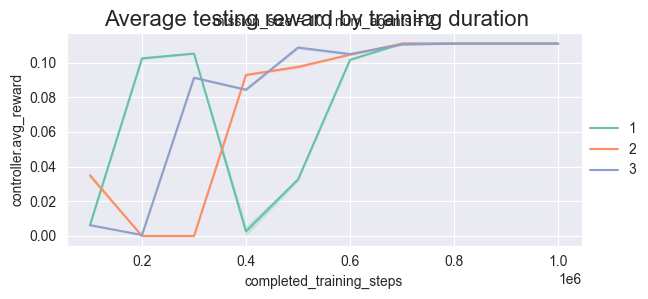

In [46]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='completed_training_steps', y='controller.avg_reward', hue='repetitions', palette=sns.color_palette('Set2', n_colors=5))

grid.add_legend()

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average testing reward by training duration', fontsize=16)

plt.show()

D:\Projetos\Simulation\venv\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)


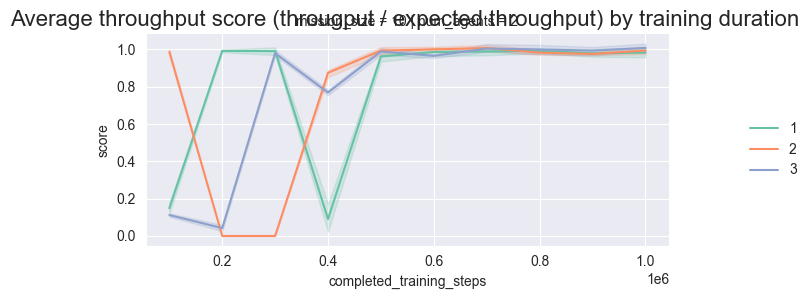

In [47]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='completed_training_steps', y='score', hue='repetitions', palette=sns.color_palette('Set2', n_colors=5))

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average throughput score (througput / expected throughput) by training duration', fontsize=16)

grid.add_legend()

plt.show()

In [48]:
q_learning_training = result_df[result_df['training']]
q_learning_training

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,score
43,43,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300098,0.054468,"[0.019898866467647387, 0.01977296167635129, 0....","[0.000359839198354166, 0.0004657445755146792, ...","[0.9988484406271044, 0.9965511529627169, 0.994...","[0.0, 1001.001001001001, 2002.002002002002, 30...",1000000,1.000325
49,49,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.299272,0.053012,"[0.022116667704444336, 0.024608870265412513, 0...","[0.0006307015341008082, 0.0007879493054933987,...","[0.9988484406271044, 0.9965511529627169, 0.994...","[0.0, 1001.001001001001, 2002.002002002002, 30...",1000000,0.997574
152,152,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300665,0.052377,"[0.015200293785781053, 0.018681610375229286, 0...","[0.00035138526919763533, 0.0005005534003838043...","[0.9988484406271044, 0.9965511529627169, 0.994...","[0.0, 1001.001001001001, 2002.002002002002, 30...",1000000,1.002215


In [49]:
q_learning_training_exploded = q_learning_training.explode(['controller.cum_avg_rewards', 'controller.losses', 'controller.epsilons', 'controller.step_bins'])
q_learning_training_exploded.reset_index(names='step', inplace=True)
q_learning_training_exploded

,step,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,score
0,43,43,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300098,0.054468,0.019899,0.00036,0.998848,0.0,1000000,1.000325
1,43,43,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300098,0.054468,0.019773,0.000466,0.996551,1001.001001,1000000,1.000325
2,43,43,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300098,0.054468,0.021187,0.000591,0.994259,2002.002002,1000000,1.000325
3,43,43,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300098,0.054468,0.021384,0.000796,0.991972,3003.003003,1000000,1.000325
4,43,43,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300098,0.054468,0.021939,0.001043,0.989691,4004.004004,1000000,1.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,152,152,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300665,0.052377,0.052196,0.000226,0.101274,994994.994995,1000000,1.002215
2993,152,152,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300665,0.052377,0.052228,0.000237,0.101041,995995.995996,1000000,1.002215
2994,152,152,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300665,0.052377,0.05226,0.000243,0.100809,996996.996997,1000000,1.002215
2995,152,152,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300665,0.052377,0.052293,0.000248,0.100577,997997.997998,1000000,1.002215


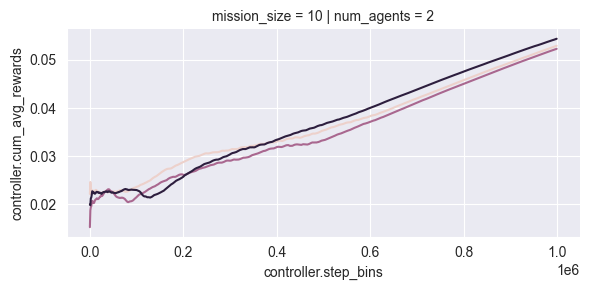

In [50]:
grid = sns.FacetGrid(q_learning_training_exploded, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='controller.step_bins', y='controller.cum_avg_rewards', hue='repetitions')

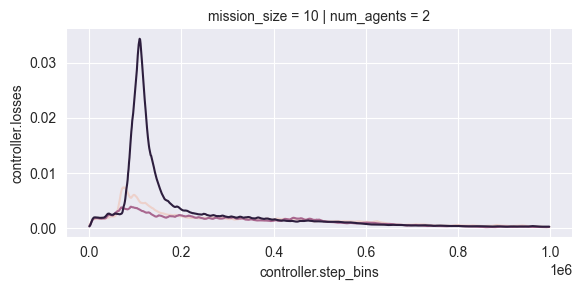

In [51]:
grid = sns.FacetGrid(q_learning_training_exploded, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='controller.step_bins', y='controller.losses', hue='repetitions')

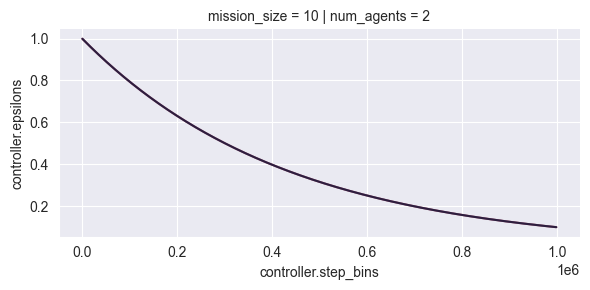

In [52]:
grid = sns.FacetGrid(q_learning_training_exploded, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='controller.step_bins', y='controller.epsilons', hue='repetitions')